# Author : Youssef Ali Manaa


### Importing libraries and loading data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")

### Intial Exploration 

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Data Cleaning

In [6]:
df.isna().sum().sort_values(ascending= False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

### Explotary Data Analysis -EDA- 

<Axes: xlabel='longitude', ylabel='latitude'>

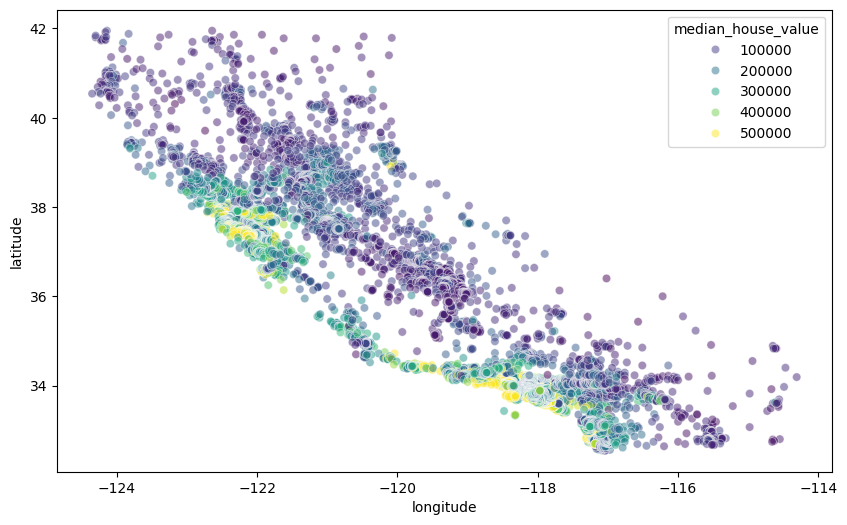

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df , x = 'longitude' , y = 'latitude' , hue = 'median_house_value' , palette='viridis',alpha=0.5)

<Figure size 1000x1500 with 0 Axes>

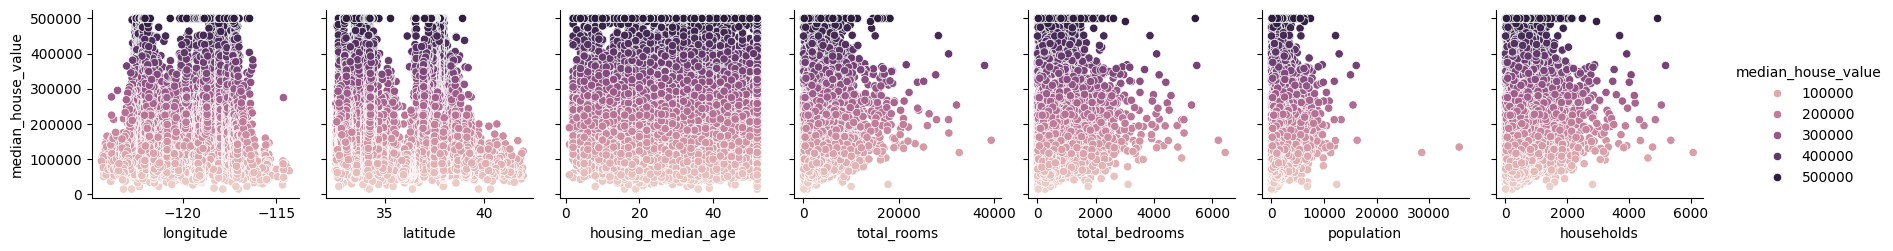

In [11]:
plt.figure(figsize=(10,15))
sns.pairplot(df,
             x_vars = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households"],
             y_vars=["median_house_value"],
             hue="median_house_value")

<Axes: >

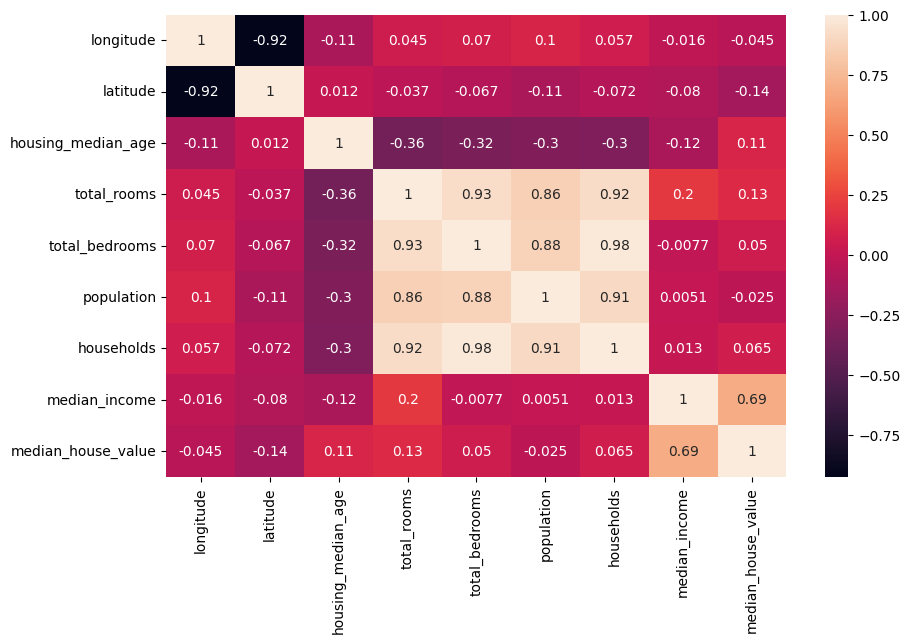

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

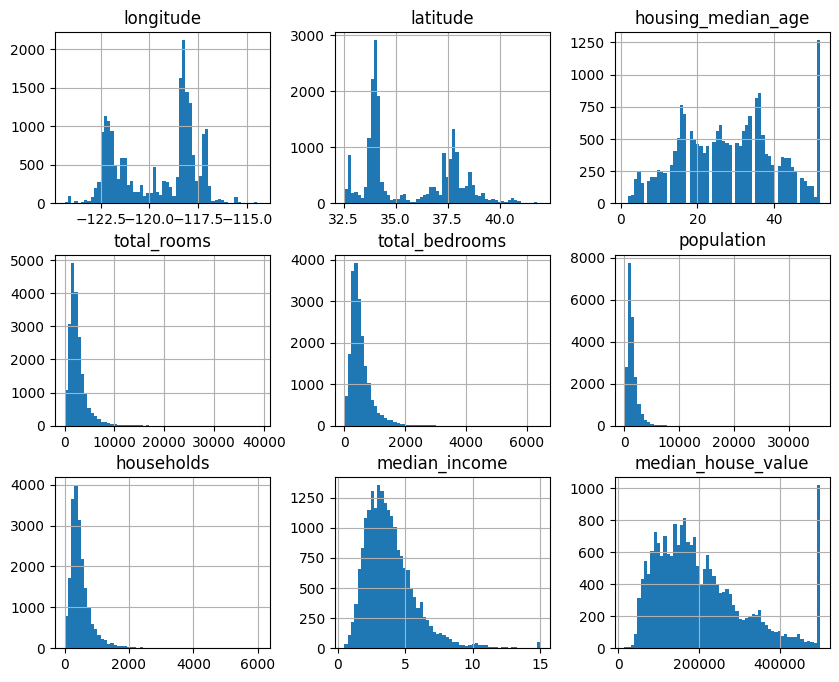

In [13]:
df.hist(bins=60,figsize=(10,8))

In [14]:
numerical_cats = [x for x in df.columns if df[x].dtype == "float64"]

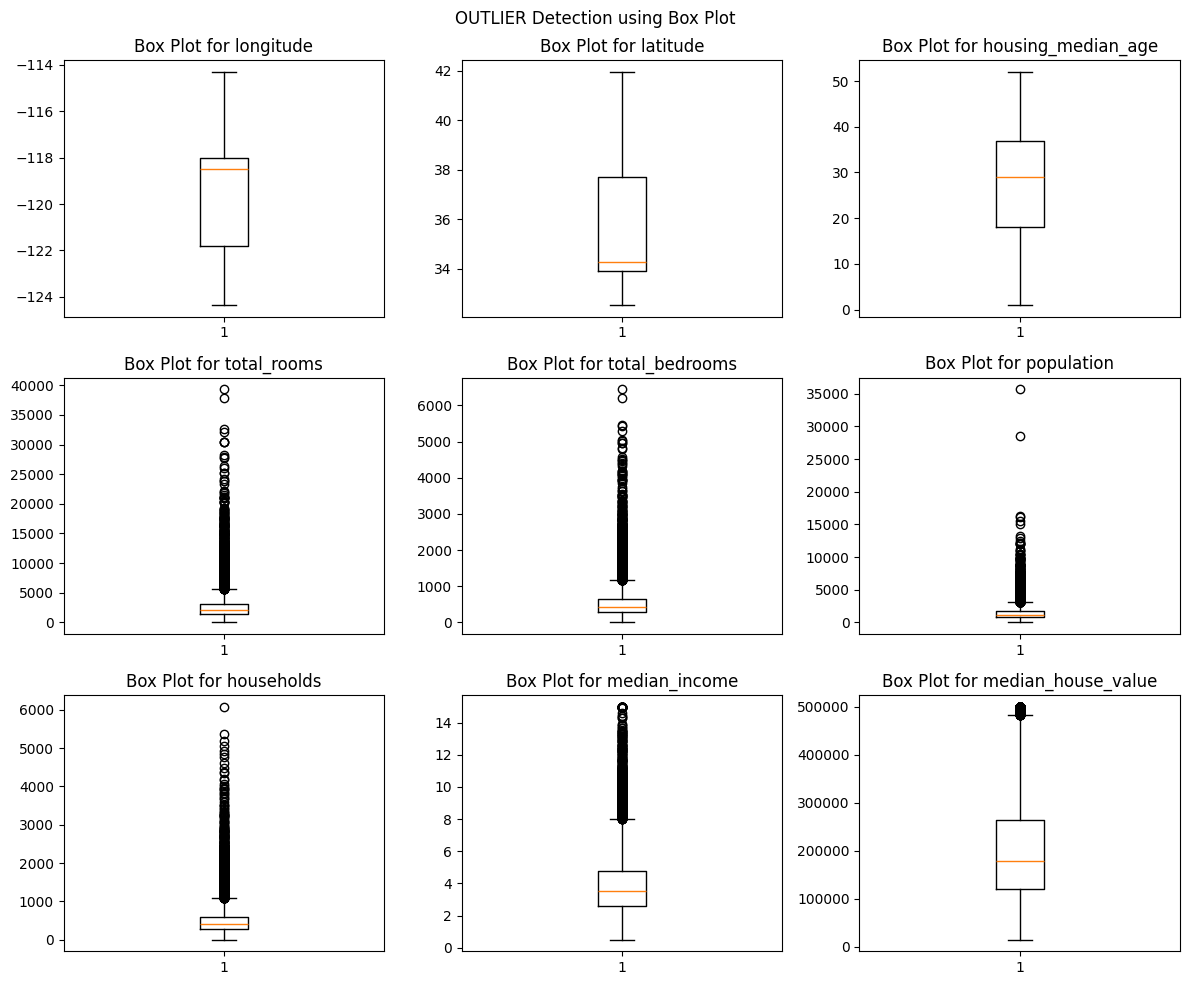

In [15]:
fig , ax = plt.subplots(3,3,figsize=(12,10))
fig.suptitle("OUTLIER Detection using Box Plot")
ax = ax.flatten()
for i, col in enumerate(numerical_cats):  
    ax[i].boxplot(df[col])  
    ax[i].set_title(f"Box Plot for {col}")

plt.tight_layout()
plt.show()

## Data Preprocessing & Feature Engineering

#### Checking for number of outliers and removing Outliers for : `total_rooms`,`total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`

In [16]:
outliers_cols = ["total_rooms","total_bedrooms", "population", "households", "median_income", "median_house_value"]
for x in outliers_cols:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[x] < (Q1 -1.5* IQR) )| (df[x] >(Q3 + 1.5* IQR))]
    print (f"LEN of outliers for {x} equals" , len(outliers))

LEN of outliers for total_rooms equals 1290
LEN of outliers for total_bedrooms equals 1271
LEN of outliers for population equals 1190
LEN of outliers for households equals 1210
LEN of outliers for median_income equals 670
LEN of outliers for median_house_value equals 1064


In [17]:
mask = pd.Series(True, index=df.index)  
for col in outliers_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    mask &= (df[col] >= lower) & (df[col] <= upper)  

df_clean = df[mask].reset_index(drop=True)

In [18]:
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
1,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
2,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
3,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
4,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


#### Feature Enigineering : Extracting New_Features

In [19]:
df_clean['bedroom_ratio'] = df_clean['total_bedrooms']/df_clean['total_rooms']
df_clean['household_rooms']= df_clean['total_rooms']/df_clean['households']
df_clean['population_per_household'] = df_clean['population']/df_clean['households']

#### Applying One Hot Encoding For `ocean_proximity` Feature

In [20]:
df_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7523
INLAND        5817
NEAR OCEAN    2204
NEAR BAY      1885
ISLAND           5
Name: count, dtype: int64

In [21]:
df_clean = df_clean.join(pd.get_dummies(df_clean.ocean_proximity)).drop(["ocean_proximity"],axis=1)

In [22]:
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136,2.802260,False,False,False,True,False
1,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352,2.547945,False,False,False,True,False
2,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853,2.181467,False,False,False,True,False
3,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.231774,4.761658,2.139896,False,False,False,True,False
4,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.192899,4.931907,2.128405,False,False,False,True,False


#### Data Splitting & Scaling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
x = df_clean.drop("median_house_value",axis=1)
y = df_clean["median_house_value"]

In [25]:
x.shape

(17434, 16)

In [26]:
y.shape

(17434,)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [28]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
x_train_scaled.shape

(13947, 16)

In [30]:
x_test_scaled.shape

(3487, 16)

## MODEL TRAINIG 

### LINEAR REGRESSION MODEL

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
lr = LinearRegression()
lr.fit(x_train_scaled , y_train)
y_pred = lr.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score: {r2:.4f}")

Model Evaluation:
  Mean Absolute Error (MAE): 42573.72
  Mean Squared Error (MSE): 3213623454.58
  Root Mean Squared Error (RMSE): 56688.83
  R² Score: 0.6311


### Tuning using grid searc

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [34]:
ridge = Ridge()

params = {"alpha": [0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(ridge, params, cv=5, scoring="r2")
grid_ridge.fit(x_train_scaled, y_train)

print("Best alpha:", grid_ridge.best_params_)
print("Best R²:", grid_ridge.best_score_)

Best alpha: {'alpha': 10}
Best R²: 0.624129973232654


In [35]:
y_pred = grid_ridge.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score: {r2:.4f}")

Model Evaluation:
  Mean Absolute Error (MAE): 42563.31
  Mean Squared Error (MSE): 3214132882.67
  Root Mean Squared Error (RMSE): 56693.32
  R² Score: 0.6310


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score: {r2:.4f}")

Model Evaluation:
  Mean Absolute Error (MAE): 29266.00
  Mean Squared Error (MSE): 1854874075.02
  Root Mean Squared Error (RMSE): 43068.25
  R² Score: 0.7871


### Tuning using grid search

In [39]:
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid_rf.fit(x_train_scaled, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best CV R²:", grid_rf.best_score_)


Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best CV R²: 0.7682619700980058


In [40]:
y_pred = grid_rf.best_estimator_.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score: {r2:.4f}")

Model Evaluation:
  Mean Absolute Error (MAE): 29096.32
  Mean Squared Error (MSE): 1835850276.07
  Root Mean Squared Error (RMSE): 42846.82
  R² Score: 0.7892


## XGBOOSTING MODEL

In [41]:
from xgboost import XGBRegressor


In [42]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(x_train_scaled, y_train)
y_pred= xgb.predict(x_test_scaled)


In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score: {r2:.4f}")

Model Evaluation:
  Mean Absolute Error (MAE): 26472.81
  Mean Squared Error (MSE): 1518356476.06
  Root Mean Squared Error (RMSE): 38966.09
  R² Score: 0.8257
